In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [63]:
iris = load_iris()

In [64]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [65]:
# print(type(iris.data))
# print(iris)
print(iris.target)
print(iris.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [66]:
# for i in iris.target:
#     if i==0.0:
#         i= 'Setosa'
#     elif i== 1.0:
#         i='Versicolour'
#     else:
#         i='Virginica'
label_map = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
iris_target_names = [label_map[label] for label in iris.target]
target = np.array(iris_target_names)

target =target.reshape(150,1)

combined_data= np.concatenate((iris.data,target), axis=1)
iris_df = pd.DataFrame(combined_data)
# print(iris.feature_names)
iris_df.columns= 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','type'
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [67]:
iris_df.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
type                 False
dtype: bool

In [68]:
iris_df['type'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: type, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y= iris_df['type']
X = iris_df.drop('type',axis=1)
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2)
ls_model = LogisticRegression()
ls_model.fit(X_train,y_train)

LogisticRegression()

In [70]:
ls_model.score(X_test,y_test)

0.9333333333333333

In [71]:
preds = ls_model.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)
cm

array([[ 9,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 12]])

Text(50.722222222222214, 0.5, 'Truth')

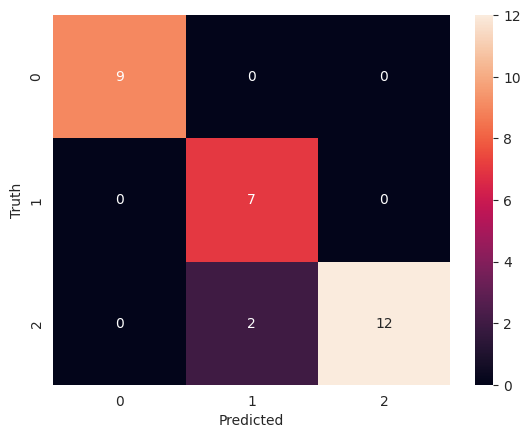

In [73]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')